In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats  # 과학용 계산 라이브러리

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

df = pd.read_csv("abalone.csv", index_col=0)
df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
id,,,,,,,,,
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9


In [3]:

# 컬렴명 확인
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight',
       'Viscera_weight', 'Shell_weight', 'Rings'],
      dtype='object')

Text(0.5, 1.0, 'check the label')

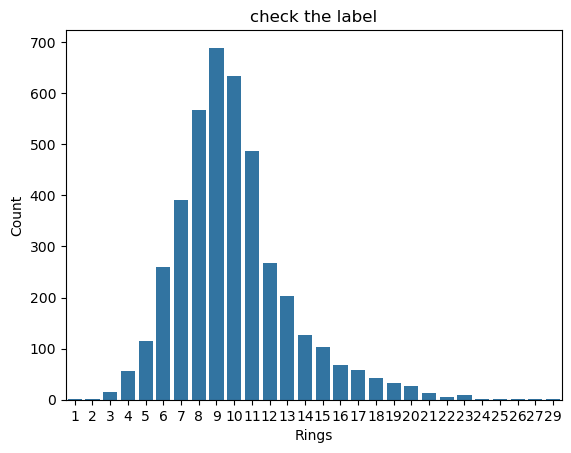

In [4]:
# 레이블 갯수 확인 (그래프)
sns.countplot(data = df, x="Rings") #df 데이터프레임에서 Rings 열의 값을 기준으로 각 레이블의 빈도수를 계산해 막대 그래프를 생성
plt.xlabel("Rings") 
plt.ylabel("Count")
plt.title("check the label") #그래프의 제목을 설정

In [5]:
# 레이블 갯수 확인 (숫자)
df['Rings'].value_counts()

Rings
9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
1       1
26      1
29      1
2       1
25      1
Name: count, dtype: int64

In [6]:
# 결측치 제거
df = df.dropna()
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64

In [7]:
################################################ Sex 컬럼 원-핫 인코딩
df = pd.get_dummies(df, columns=['Sex'])
df

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Sex_F,Sex_I,Sex_M
id,,,,,,,,,,,
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,False,False,True
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,False,False,True
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,True,False,False
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,False,False,True
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,True,False,False
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,False,False,True
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,False,False,True


C:\Users\tyra\AppData\Local\Temp\ipykernel_17048\71428647.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Length'], kde = True, hist = False, ax=ax1) #이 줄은 df 데이터프레임에서 mean radius 칼럼의 분포를 그립니다. sns.distplot은 seaborn에서 제공하는 함수로, 주어진 데이터의 히스토그램과 커널 밀도 추정(KDE)을 그려줍니다.
C:\Users\tyra\AppData\Local\Temp\ipykernel_17048\71428647.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functi

<Axes: xlabel='Length', ylabel='Density'>

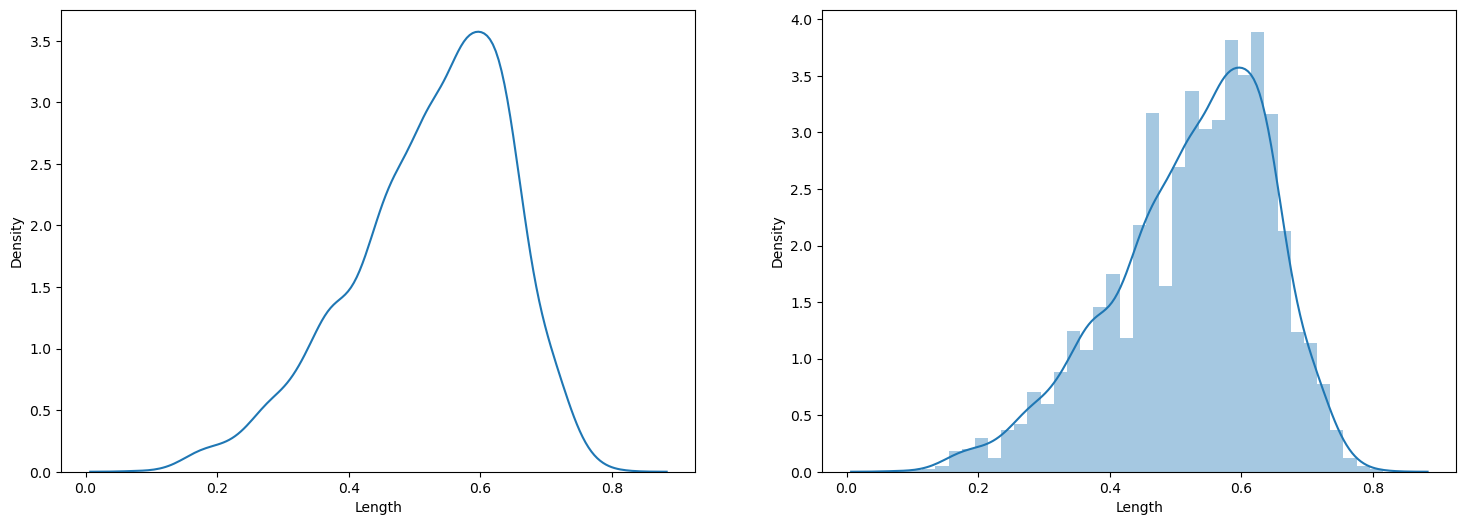

In [8]:
# 컬럼별 히스토그램 확인
# 'mean radius'와'mean texture' 칼럼을 선택

figure = plt.figure(figsize=(18,6)) #새로운 그림(Figure)을 생성하고, 그 크기를 너비 18인치, 높이 6인치로 설정합니다. 그리고 figure 변수에 이 Figure 객체를 저장
ax1 = plt.subplot(1,2,1) #plt.subplot(1,2,1)은 1행 2열짜리 서브플롯을 만들고, 그중 첫 번째(왼쪽) 서브플롯을 지정합니다. ax1는 이 서브플롯을 가리키는 객체로, 이후 그래프를 그릴 때 이 위치에 그릴 수 있게 해줍니다.
sns.distplot(df['Length'], kde = True, hist = False, ax=ax1) #이 줄은 df 데이터프레임에서 mean radius 칼럼의 분포를 그립니다. sns.distplot은 seaborn에서 제공하는 함수로, 주어진 데이터의 히스토그램과 커널 밀도 추정(KDE)을 그려줍니다.
ax2 = plt.subplot(1,2,2)
sns.distplot(df['Length'], ax=ax2)

C:\Users\tyra\AppData\Local\Temp\ipykernel_17048\2283425298.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax = ax) #df.hist()는 **데이터프레임의 각 열(Column)**에 대해 자동으로 히스토그램을 그리는 함수입니다. df에 있는 모든 수치형 컬럼에 대해 각각의 히스토그램을 생성함. ax = ax는 앞서 만든 축(ax)에 모든 히스토그램을 그리도록 설정한 부분


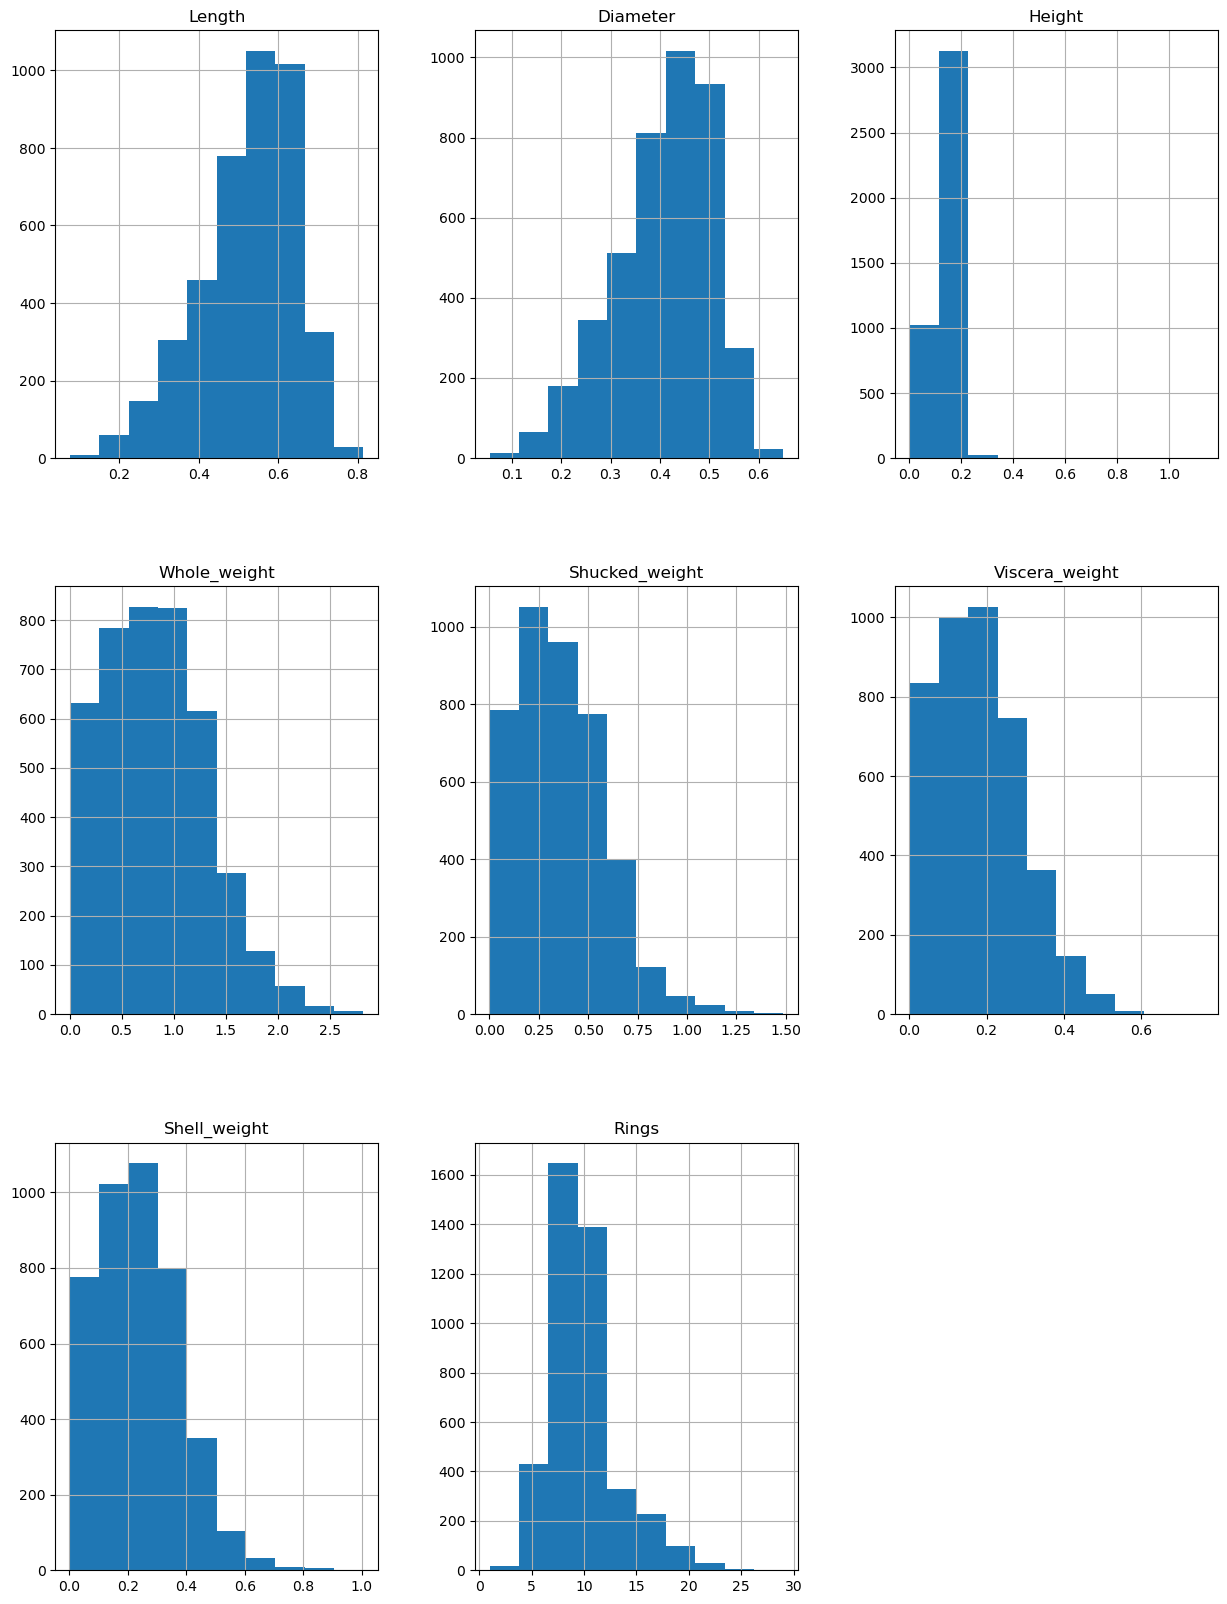

In [9]:
# 각 컬럼별 히스토 그램 확인

fig = plt.figure(figsize = (15,20)) #plt.figure()는 새로운 그림(Figure)을 생성하는 함수입니다. figsize=(15,20)는 그래프의 전체 크기를 설정합니다
ax = fig.gca() #gca()는 **현재의 축(Axes)**를 반환하는 함수
df.hist(ax = ax) #df.hist()는 **데이터프레임의 각 열(Column)**에 대해 자동으로 히스토그램을 그리는 함수입니다. df에 있는 모든 수치형 컬럼에 대해 각각의 히스토그램을 생성함. ax = ax는 앞서 만든 축(ax)에 모든 히스토그램을 그리도록 설정한 부분
plt.show()

In [10]:
#df 데이터프레임에서 label 열을 제거하고, ***새로운 데이터프레임 X를 생성***한 후, 그 상위 5개의 행을 확인하는 코드

X=df.drop('Rings',axis=1)
X.head()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Sex_F,Sex_I,Sex_M
id,,,,,,,,,,
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,False,False,True
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,False,False,True
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,True,False,False
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,False,False,True
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,False,True,False


In [11]:
df

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Sex_F,Sex_I,Sex_M
id,,,,,,,,,,,
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,False,False,True
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,False,False,True
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,True,False,False
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,False,False,True
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,True,False,False
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,False,False,True
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,False,False,True


In [12]:
#df 데이터프레임에서 label 열의 값들을 추출하여 **y**라는 변수에 저장하고, label 값이 얼마나 자주 등장하는지 빈도수를 계산하는 코드

y=df['Rings']
y.value_counts()

Rings
9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
1       1
26      1
29      1
2       1
25      1
Name: count, dtype: int64

# 1. ML_분류

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,random_state=0)

In [14]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier  # 분류용 KNN

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [15]:
#SVM classification

from sklearn.svm import SVC

clf_svm = SVC(random_state=0) #random_state를 지정하면 모델의 무작위적인 요소가 고정되어 실행할 때마다 동일한 결과
clf_svm.fit(X_train, y_train) #X_train(입력 데이터)와 y_train(레이블 데이터)를 사용하여 학습을 수행

pred_svm = clf_svm.predict(X_test) #테스트 데이터인 X_test를 입력으로 받아, 학습된 SVM 모델이 해당 데이터에 대한 예측 결과(클래스 값)를 반환해서 pred_svm에 저장

print("\n--- SVM Classifier ---")
print(accuracy_score(y_test, pred_svm)) #실제 레이블과 예측된 레이블을 넣어서 정확도를 확인해봄
print(confusion_matrix(y_test, pred_svm))


--- SVM Classifier ---
0.24401913875598086
[[ 0  5  0  0  0  0  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  3  0 10  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  4  0 26  3  0  6  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  0 31 17  4  9  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 27 29 21 35  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  6 11 48 65  8  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  5 27 83 33  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  2  9 69 40 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  2  5 51 41 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  2  3 41 34 13  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  2 21 14 13  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  2 16 10  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  7 11  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1 

In [16]:
# Logisitc Regression classification

import warnings
warnings.filterwarnings('ignore') #요걸로 빨갛게 뜨는 warning 지울 수 있음

clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(X_train, y_train)

pred_lr = clf_lr.predict(X_test)

print ("\n--- Logistic Regression Classifier ---")
print (accuracy_score(y_test, pred_lr))
print (confusion_matrix(y_test, pred_lr))


--- Logistic Regression Classifier ---
0.23923444976076555
[[ 0  0  3  3  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  2 11  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 30  8  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 24 27  6  5  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 21 36 27 28  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  5 14 59 51  9  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1 11 32 62 42  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  6 17 47 46 22  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  8 15 29 47 22  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  6 31 37 17  0  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  2 11 20 16  0  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  3 11 13  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  2  4 11  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0

In [17]:
# Random Forest classification

from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

print ("\n--- Radom Forest ---")
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
print(accuracy_score(y_test,pred))
print (confusion_matrix(y_test, pred))


--- Radom Forest ---
0.24114832535885167
[[ 0  7  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  5  6  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  9 15 11  3  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  6 20 24  8  3  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  3 29 29 36  8  7  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  3  5 19 55 32 15  8  1  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  3  8 28 46 41 17  3  5  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  3  4 12 37 45 22  8  4  1  1  1  0  0  1  0  0  0  0  0  0]
 [ 0  0  0  1  4 11 30 41 24  4  3  0  1  1  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  1  6 24 28 18  6  5  1  0  2  0  0  0  0  0  0  1  0  0]
 [ 0  0  0  0  1  3  7 12 16  4  3  2  0  0  1  1  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  2  5  9  6  2  1  3  2  2  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  3  3  7  3  1  2  0  0  2  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  2

In [18]:
# Decision Tree classification

from sklearn.tree import DecisionTreeClassifier

clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(X_train, y_train)

pred_dt = clf_dt.predict(X_test)

print ("\n--- Decision Tree Classifier ---")
print (accuracy_score(y_test, pred_dt))
print (confusion_matrix(y_test, pred_dt))


--- Decision Tree Classifier ---
0.17416267942583732
[[ 1  5  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  4  5  3  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 14  9  9  5  1  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  3  7 14 25  9  2  0  2  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0]
 [ 0  0  4 22 29 33 16  7  0  0  2  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  2  4 25 33 33 22  9  6  2  0  2  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  2 11 23 35 32 21 10  8  1  2  3  1  2  0  0  1  0  0  0  0  0]
 [ 0  1  0  1  9 17 33 27 18 13 10  5  2  1  0  1  1  0  0  0  0  0  0  0]
 [ 0  0  0  1  1 13 24 32 13 11 11  6  2  1  2  3  0  0  1  0  0  0  0  0]
 [ 0  0  0  1  1  9 21 20  8  5 12  4  1  0  0  4  1  0  0  2  4  0  0  0]
 [ 0  0  0  0  0  7 10  8  7  8  6  2  0  1  0  0  1  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  4  5  8  2  3  2  4  2  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  1  4  4  3  1  1  2  0  3  1

In [19]:
# KNN (K-Nearest Neighbors, K 최근접 이웃) classification

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# 1. KNN 모델 생성
clf_knn = KNeighborsClassifier(n_neighbors=5)  # 기본적으로 k=5로 설정, 예측할 때 가장 가까운 5개의 이웃을 기준으로 다수결 투표를 하여 분류를 수행

clf_knn.fit(X_train, y_train)

pred_knn = clf_knn.predict(X_test)

print("\n--- KNN Classifier ---")
print("Accuracy:", accuracy_score(y_test, pred_knn))  # 정확도 출력
print("Confusion Matrix:\n", confusion_matrix(y_test, pred_knn))  # 혼동 행렬 출력



--- KNN Classifier ---
Accuracy: 0.20478468899521532
Confusion Matrix:
 [[ 0  7  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  3  7  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  8 13 12  6  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  2  8 20 25  5  1  1  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  4 35 27 31  9  6  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1 11 21 48 34 19  3  1  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  3 14 42 41 37  8  3  0  0  1  1  1  0  1  0  0  0  0  0  0]
 [ 0  0  0  3  9 18 45 31 19  6  5  0  2  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  2  5 18 39 27 23  1  3  1  0  0  2  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  4 11 18 32 19  3  4  0  0  1  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  2  5 11 12 13  2  2  1  0  0  3  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  2  3  5  8  7  2  1  2  1  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  5  4  5  5  0  1  0  1  0  0  0  0  0  0  

# 2. ML_회귀

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X,
                                                  y,
                                                  test_size=0.2,
                                                  shuffle=True,
                                                  random_state=12) #X는 입력데이터(특성 혹은 특성들. 테이블의 열), y는 정답값(레이블)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


#ex. 훈련 세트 :(16512, 8) (16512,)
#X_train.shape = (16512, 8): X_train은 16,512개의 샘플(데이터 행)과 8개의 특징(열)
#y_train.shape = (16512,):y_train은 16,512개의 정답값(레이블)을 나타냄. 근데 (정답갑, 정답값의 개수)로 여기는 정답갑의 개수가 딱 하나인거임,
#다중 출력이나 다중 레이어 문제가 아니라서

(3341, 10) (3341,)
(836, 10) (836,)


# linear regression

In [21]:
#Linear regression

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


model = LinearRegression()
model.fit(X_train, y_train)
ly_preds = model.predict(X_test)

print('평균제곱근오차', mean_squared_error(ly_preds, y_test))

평균제곱근오차 4.592399305133728


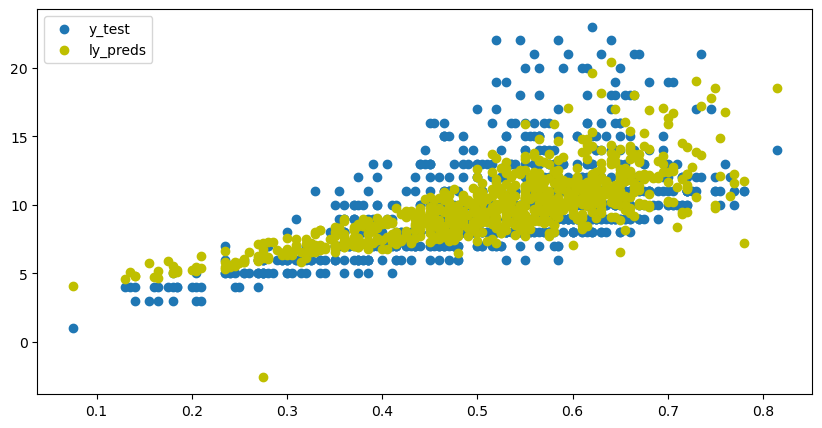

In [24]:
# 예측값과 실제 값 차이를 산접도(scatter)로 표시, 노란색 예측

plt.figure(figsize=(10,5))
plt.scatter(X_test['Length'], y_test, label='y_test') #X_test['Rings']: Rings을 x축에 놓습니다. y_test: 실제 주택 가격을 y축에 놓습니다.
plt.scatter(X_test['Length'], ly_preds, c='y', label='ly_preds')
    #X_test['Rings']: Rings을 x축에 놓습니다. ly_preds: 모델이 예측한 주택 가격을 y축에 놓습니다. c='y': 점들의 색상을 노란색으로 지정합니다

#plt.plot(X_train, model.predict(X_train), color='red') 학습된 선형 회귀 모델이 훈련 데이터(X_train)에서 어떻게 예측하는지 회귀선을 그릴 수 있음
plt.legend() #범례
plt.show()

#scatter에서 label은 범례 이름일 뿐임

# Random Tree

In [25]:

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

ry_preds = model.predict(X_test)
print('평균제곱근오차', mean_squared_error(ry_preds, y_test))

평균제곱근오차 4.471269497607656


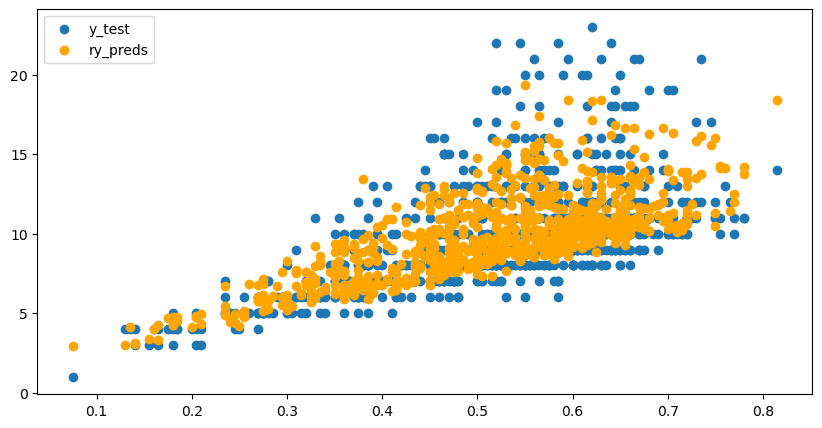

In [27]:
plt.figure(figsize=(10,5))
plt.scatter(X_test['Length'], y_test, label='y_test') #실제값
plt.scatter(X_test['Length'], ry_preds, c='orange', label='ry_preds') #예측값

plt.legend() #범례 추가하는 거 label에 해당하는 것들 말임.
plt.show()

# Decision Tree

In [28]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

dy_preds = model.predict(X_test)
print('평균제곱근오차', mean_squared_error(dy_preds, y_test))

평균제곱근오차 8.22846889952153


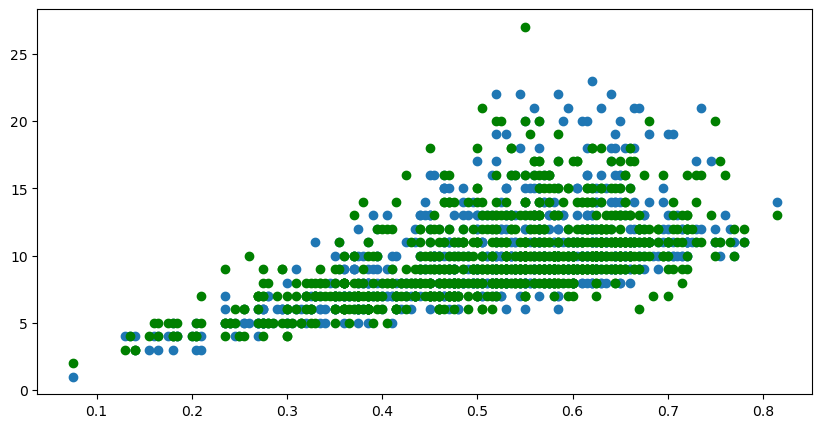

In [29]:
plt.figure(figsize=(10,5))
plt.scatter(X_test['Length'], y_test, label='y_test')
plt.scatter(X_test['Length'], dy_preds, c='g', label='dy_preds')
plt.show()        

# KNN

In [30]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# KNN 모델 생성 및 학습
model = KNeighborsRegressor(n_neighbors=5)  # n_neighbors=5는 기본값으로, K값을 설정
model.fit(X_train, y_train)

# 예측
knn_preds = model.predict(X_test)

# 평균 제곱 오차(MSE) 계산
print('평균제곱근오차', mean_squared_error(knn_preds, y_test))


평균제곱근오차 4.749234449760766


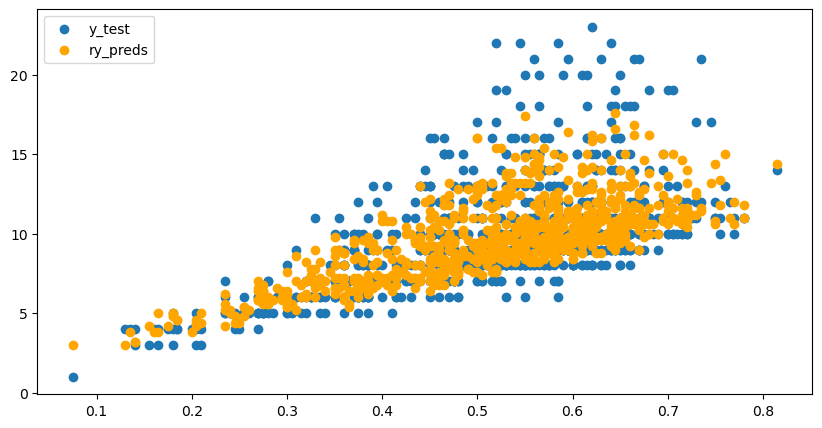

In [31]:
plt.figure(figsize=(10,5))
plt.scatter(X_test['Length'], y_test, label='y_test') #실제값
plt.scatter(X_test['Length'], knn_preds, c='orange', label='ry_preds') #예측값

plt.legend() #범례 추가
plt.show()

# SVM

In [32]:
#SVR 계산 시간이 오래 걸림 그래서 결과를 못 봄

from sklearn.svm import SVR

#model = SVR(kernel='linear') #비선형 관계는 kernel='rbf' 많이 씀
#model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

#ry_preds = model.predict(X_test)
#print('평균제곱근오차', mean_squared_error(ry_preds, y_test))

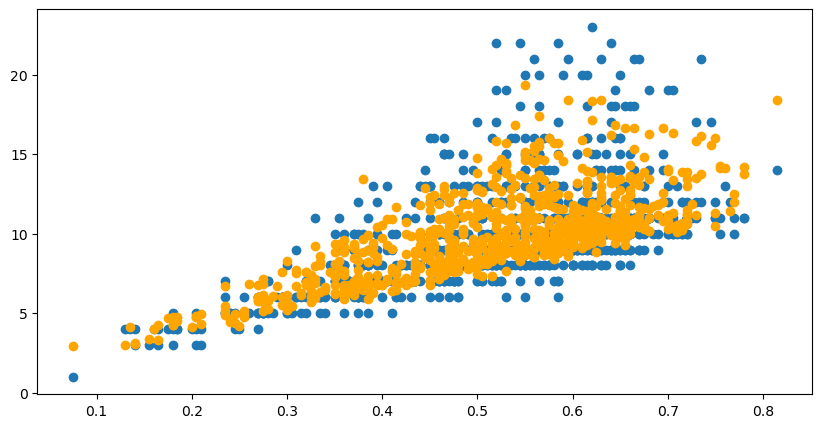

In [33]:
plt.figure(figsize=(10,5))
plt.scatter(X_test['Length'], y_test, label='y_test')
plt.scatter(X_test['Length'], ry_preds, c='orange', label='ry_preds')

plt.show()    